In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating a dataset

np.random.seed(42)

# Generate 983 normal data points (x and y between 10 and 50)
x_normal = np.random.randint(10, 51, 983)
y_normal = np.random.randint(10, 51, 983)

# Generate 17 outliers (x and y outside the range 100-200)
x_outliers = np.random.randint(100, 201, 17)
y_outliers = np.random.randint(100, 201, 17)

# Combine
x = np.concatenate([x_normal, x_outliers])
y = np.concatenate([y_normal, y_outliers])

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Shuffle the dataset so outliers aren't all at the end
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

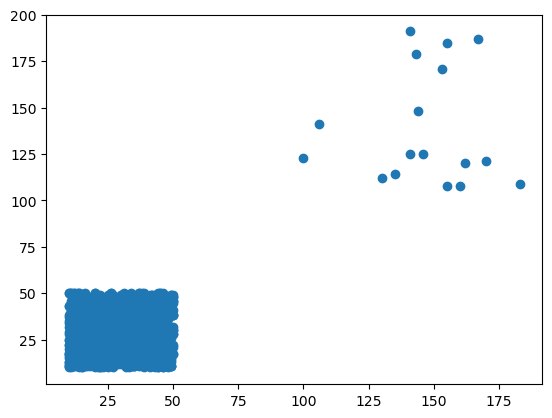

In [3]:
plt.scatter(x=df['x'], y=df['y'])

In [4]:
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=20, n_jobs=-1, contamination='auto')

In [6]:
clf.fit(df)

LocalOutlierFactor(n_jobs=-1)

In [9]:
y_pred=clf.fit_predict(df)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [10]:
outlier_index=np.where(y_pred==-1)
outlier_index

(array([ 27,  86, 112, 133, 173, 231, 251, 388, 399, 475, 518, 561, 618,
        662, 792, 899, 941]),)

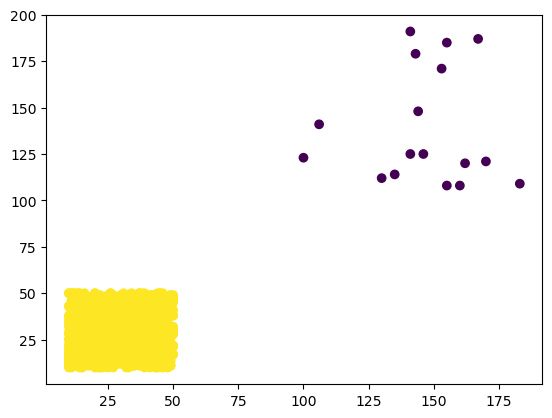

In [12]:
plt.scatter(x=df['x'], y=df['y'], c=y_pred)